In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import phik
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('cs-training.csv', index_col=[0])
test_data = pd.read_csv('cs-test.csv', index_col=[0])

In [3]:
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [6]:
train_data.RevolvingUtilizationOfUnsecuredLines.max()

50708.0

<Axes: >

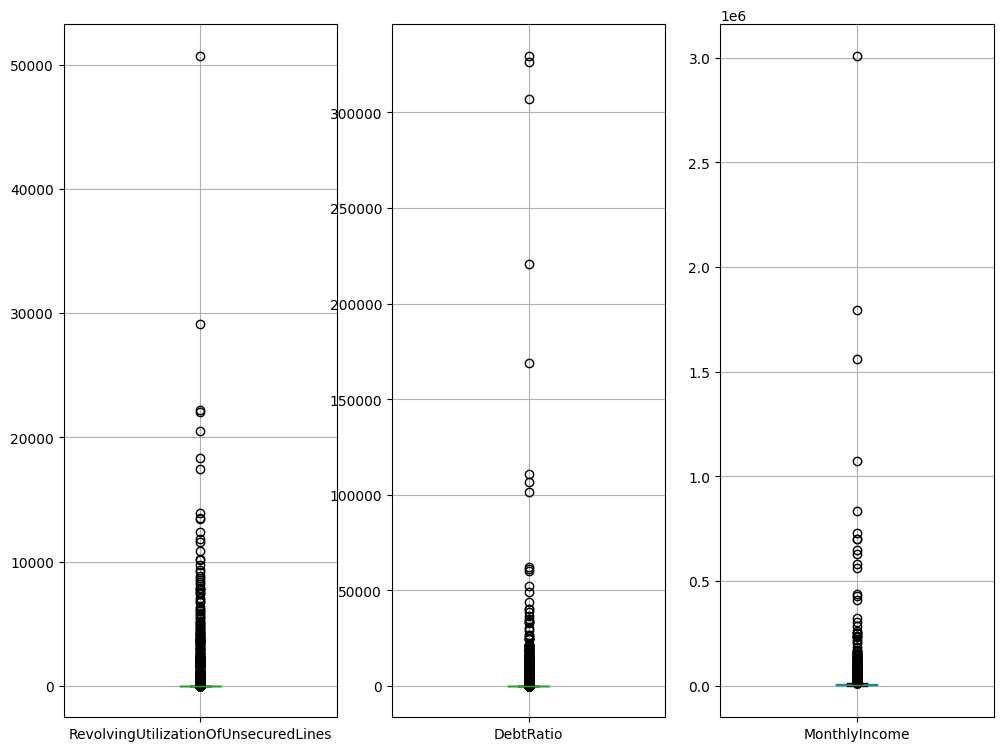

In [7]:
fix, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,9))

train_data.boxplot(train_data.columns[1], ax=axis[0])
train_data.boxplot(train_data.columns[4], ax=axis[1])
train_data.boxplot(train_data.columns[5], ax=axis[2])

interval columns not set, guessing: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


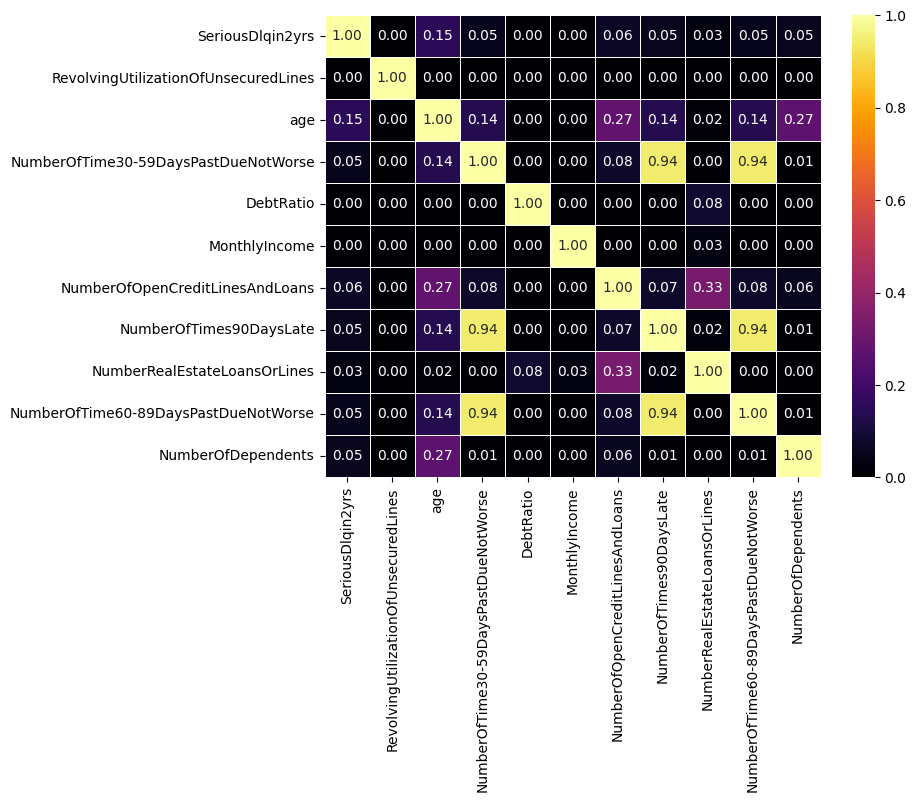

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(phik.phik_matrix(train_data), annot=True, cmap='inferno', fmt='.2f', linewidths=.5)
plt.show()

In [9]:
train_data, val_data = train_test_split(train_data, test_size=0.2, train_size=0.8, stratify=train_data.SeriousDlqin2yrs)

In [10]:
train_data.MonthlyIncome.fillna(0, inplace=True)

In [11]:
train_data.NumberOfDependents.value_counts()

NumberOfDependents
0.0     69523
1.0     21058
2.0     15633
3.0      7578
4.0      2284
5.0       607
6.0       123
7.0        39
8.0        16
9.0         4
10.0        4
Name: count, dtype: int64

In [12]:
train_data.NumberOfDependents.fillna(0, inplace=True)

In [13]:
train_data.NumberOfDependents = train_data.NumberOfDependents.astype(np.int64)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 11101 to 27952
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         120000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberOfTimes90DaysLate               120000 non-null  int64  
 8   NumberRealEstateLoansOrLines          120000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 10  NumberOfDependents                    120000 non-null  int64  
dtypes:

In [15]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 110163 to 66287
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      30000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  30000 non-null  float64
 2   age                                   30000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  30000 non-null  int64  
 4   DebtRatio                             30000 non-null  float64
 5   MonthlyIncome                         24081 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       30000 non-null  int64  
 7   NumberOfTimes90DaysLate               30000 non-null  int64  
 8   NumberRealEstateLoansOrLines          30000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  30000 non-null  int64  
 10  NumberOfDependents                    29207 non-null  float64
dtypes: float64(4), 

In [16]:
val_data.MonthlyIncome.fillna(0, inplace=True)

In [17]:
val_data.NumberOfDependents.value_counts()

NumberOfDependents
0.0     17379
1.0      5258
2.0      3889
3.0      1905
4.0       578
5.0       139
6.0        35
7.0        12
8.0         8
9.0         1
20.0        1
10.0        1
13.0        1
Name: count, dtype: int64

In [18]:
val_data.NumberOfDependents.fillna(0, inplace=True)

In [19]:
val_data.NumberOfDependents = val_data.NumberOfDependents.astype(np.int64)

In [20]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 110163 to 66287
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      30000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  30000 non-null  float64
 2   age                                   30000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  30000 non-null  int64  
 4   DebtRatio                             30000 non-null  float64
 5   MonthlyIncome                         30000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       30000 non-null  int64  
 7   NumberOfTimes90DaysLate               30000 non-null  int64  
 8   NumberRealEstateLoansOrLines          30000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  30000 non-null  int64  
 10  NumberOfDependents                    30000 non-null  int64  
dtypes: float64(3), 

In [21]:
ruul_transformer = QuantileTransformer()
dr_transformer = QuantileTransformer()
mi_transformer = QuantileTransformer()

In [22]:
train_data['RevolvingUtilizationOfUnsecuredLines'] = ruul_transformer.fit_transform(train_data[['RevolvingUtilizationOfUnsecuredLines']])

In [23]:
train_data['DebtRatio'] = dr_transformer.fit_transform(train_data[['DebtRatio']])

In [24]:
train_data['MonthlyIncome'] = mi_transformer.fit_transform(train_data[["MonthlyIncome"]])

<Axes: >

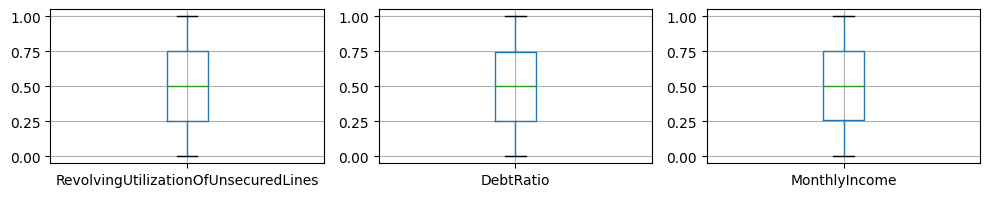

In [25]:
fix, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,2))

train_data.boxplot(train_data.columns[1], ax=axis[0])
train_data.boxplot(train_data.columns[4], ax=axis[1])
train_data.boxplot(train_data.columns[5], ax=axis[2])

In [26]:
val_data.RevolvingUtilizationOfUnsecuredLines = ruul_transformer.transform(val_data[["RevolvingUtilizationOfUnsecuredLines"]])
val_data.DebtRatio = dr_transformer.transform(val_data[["DebtRatio"]])
val_data.MonthlyIncome = mi_transformer.transform(val_data[["MonthlyIncome"]])

<Axes: >

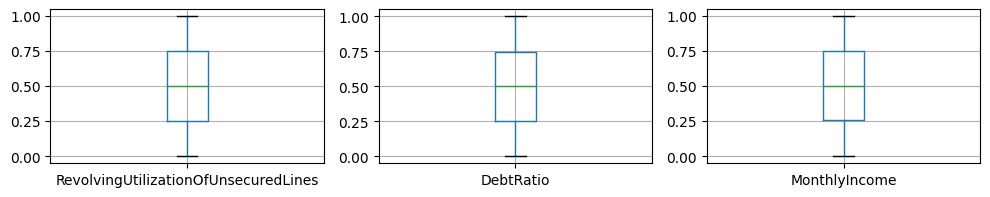

In [27]:
fix, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,2))

val_data.boxplot(val_data.columns[1], ax=axis[0])
val_data.boxplot(val_data.columns[4], ax=axis[1])
val_data.boxplot(val_data.columns[5], ax=axis[2])

In [28]:
train_class_weight = compute_class_weight(class_weight='balanced', classes=train_data.SeriousDlqin2yrs.unique(), y=train_data.SeriousDlqin2yrs)

In [29]:
val_class_weight = compute_class_weight(class_weight='balanced', classes=val_data.SeriousDlqin2yrs.unique(), y=val_data.SeriousDlqin2yrs)

In [30]:
val_data.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    27995
1     2005
Name: count, dtype: int64

In [31]:
train_data.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    111979
1      8021
Name: count, dtype: int64

In [32]:
train_class_weight

array([0.53581475, 7.48036404])

In [33]:
val_class_weight

array([0.53580997, 7.48129676])

<BarContainer object of 2 artists>

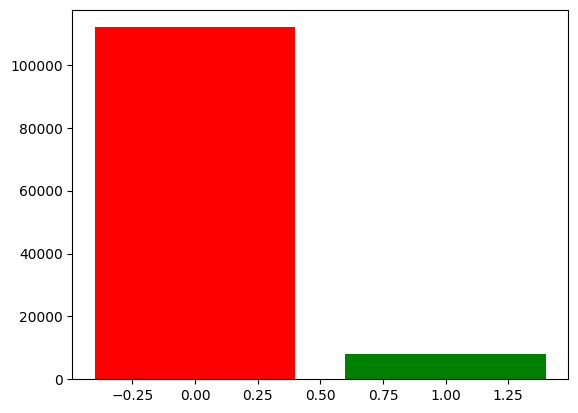

In [34]:
plt.bar(train_data.SeriousDlqin2yrs.value_counts().index, train_data.SeriousDlqin2yrs.value_counts(), color=['red','green'])

<BarContainer object of 2 artists>

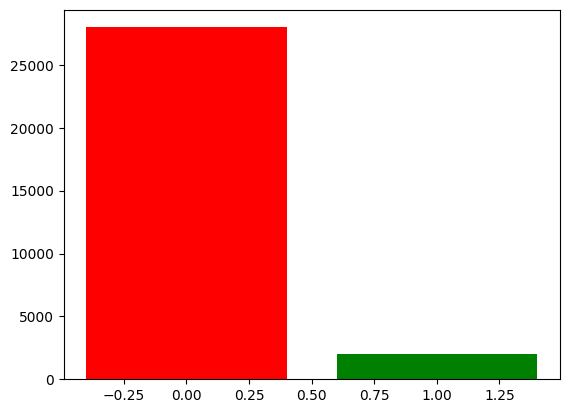

In [35]:
plt.bar(val_data.SeriousDlqin2yrs.value_counts().index, val_data.SeriousDlqin2yrs.value_counts(), color=['red','green'])

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtypes: fl

In [37]:
test_data.MonthlyIncome.fillna(0, inplace=True)

In [38]:
test_data.NumberOfDependents.value_counts()

NumberOfDependents
0.0     58618
1.0     17618
2.0     13298
3.0      6623
4.0      1995
5.0       526
6.0       125
7.0        50
8.0        16
10.0        3
9.0         3
20.0        1
43.0        1
Name: count, dtype: int64

In [39]:
test_data.NumberOfDependents.fillna(0, inplace=True)

In [40]:
test_data.RevolvingUtilizationOfUnsecuredLines = ruul_transformer.transform(test_data[["RevolvingUtilizationOfUnsecuredLines"]])
test_data.DebtRatio = dr_transformer.transform(test_data[["DebtRatio"]])
test_data.MonthlyIncome = mi_transformer.transform(test_data[["MonthlyIncome"]])

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    101503 non-null  float64
dtypes: fl

In [42]:
train_data.to_csv('train_data.csv', index=None)
val_data.to_csv('val_data.csv', index=None)
test_data.to_csv('test_data.csv', index=None)

In [115]:
model: tf.keras.models.Model = tf.keras.models.load_model('model_cp_9')
x_test = tf.convert_to_tensor(test_data.drop(test_data.columns[:1], axis=1))
y_test = pd.read_csv('sampleEntry.csv', index_col='Id')

In [112]:
y_pred = model.predict(tf.convert_to_tensor(test_data.drop(test_data.columns[:1], axis=1), dtype=tf.float32))

3172/3172 [==============================] - 3s 993us/step


In [116]:
y_test_classes = tf.one_hot(tf.convert_to_tensor(np.where(y_test>0.5, 1, 0).reshape(-1)), depth=2)

In [117]:
model.evaluate(x_test, y_test_classes)

3172/3172 [==============================] - 4s 1ms/step - loss: 0.4115 - auc: 0.8946


[0.41149210929870605, 0.8946298360824585]

Пропуски по ЗП заполнялись 0 по той причине, что их довольно таки много и я решил, что лучше заполнить 0(своего рода Unknown). В категориальных признаках основываясь на моде. В датасете довольно жесткий дисбаланс классов и при разделении выборки на валидационную и тренировочную использовался механизм stratify. Валидационную выборку я решил ручками отделить от тренировночной, чтобы масштабирование выполнялось независимо от всей выборки(борьба с утечкой???). Метрика AUC была выбрана по той причине, что на каггле с этим датасетом было соревнование и целью являлась максимизация AUC. После обработки данных построил примитивную нейронку с чекпоинтами и батч нормализацией. Немного поменял аргументы у оптимизатора Adam такие как epsilon(я его увеличил, чтобы если и будет градиент равен 0, то двигалось оно чуть сильнее) ну и amsgrad и ema_momentum включил соответственно. По поводу чекпоинтов говорить смысла не вижу. Тест модели на тестовой выборке я делал на основе того, что если вероятность выше 0.5, то это класс 1(файлик sampleEntry). Тут лежит 4 модели, т.к. они по-разному себя ведут на всех выборках и при запуске обучения инициализация весов приводился к метрике AUC = 0.94(на валидационной выборке), но при этом и тестовую решала на отлично(с тренировочной там было около 0.6).